CUBIC SPLINE INTERPOLATION FOR y = sin(x)
Interval: [3.0, 5.0], n = 10 segments, h = 0.2000

Grid points (n = 10, total 11 points):
x_0 = 3.0000,  f(x_0) = 0.14112001
x_1 = 3.2000,  f(x_1) = -0.05837414
x_2 = 3.4000,  f(x_2) = -0.25554110
x_3 = 3.6000,  f(x_3) = -0.44252044
x_4 = 3.8000,  f(x_4) = -0.61185789
x_5 = 4.0000,  f(x_5) = -0.75680250
x_6 = 4.2000,  f(x_6) = -0.87157577
x_7 = 4.4000,  f(x_7) = -0.95160207
x_8 = 4.6000,  f(x_8) = -0.99369100
x_9 = 4.8000,  f(x_9) = -0.99616461
x_10 = 5.0000,  f(x_10) = -0.95892427

Clamped boundary conditions:
S'(3.0) = f'(3.0) = -0.98999250
S'(5.0) = f'(5.0) = 0.28366219

Second derivatives at nodes (c_i = S''(x_i)):
c_0 = -0.12248880  (exact f''(x_0) = -0.14112001)
c_1 = 0.02062978  (exact f''(x_1) = 0.05837414)
c_2 = 0.26655982  (exact f''(x_2) = 0.25554110)
c_3 = 0.44127355  (exact f''(x_3) = 0.44252044)
c_4 = 0.61463001  (exact f''(x_4) = 0.61185789)
c_5 = 0.75913289  (exact f''(x_5) = 0.75680250)
c_6 = 0.87453751  (exact f''(x_6) = 0.871

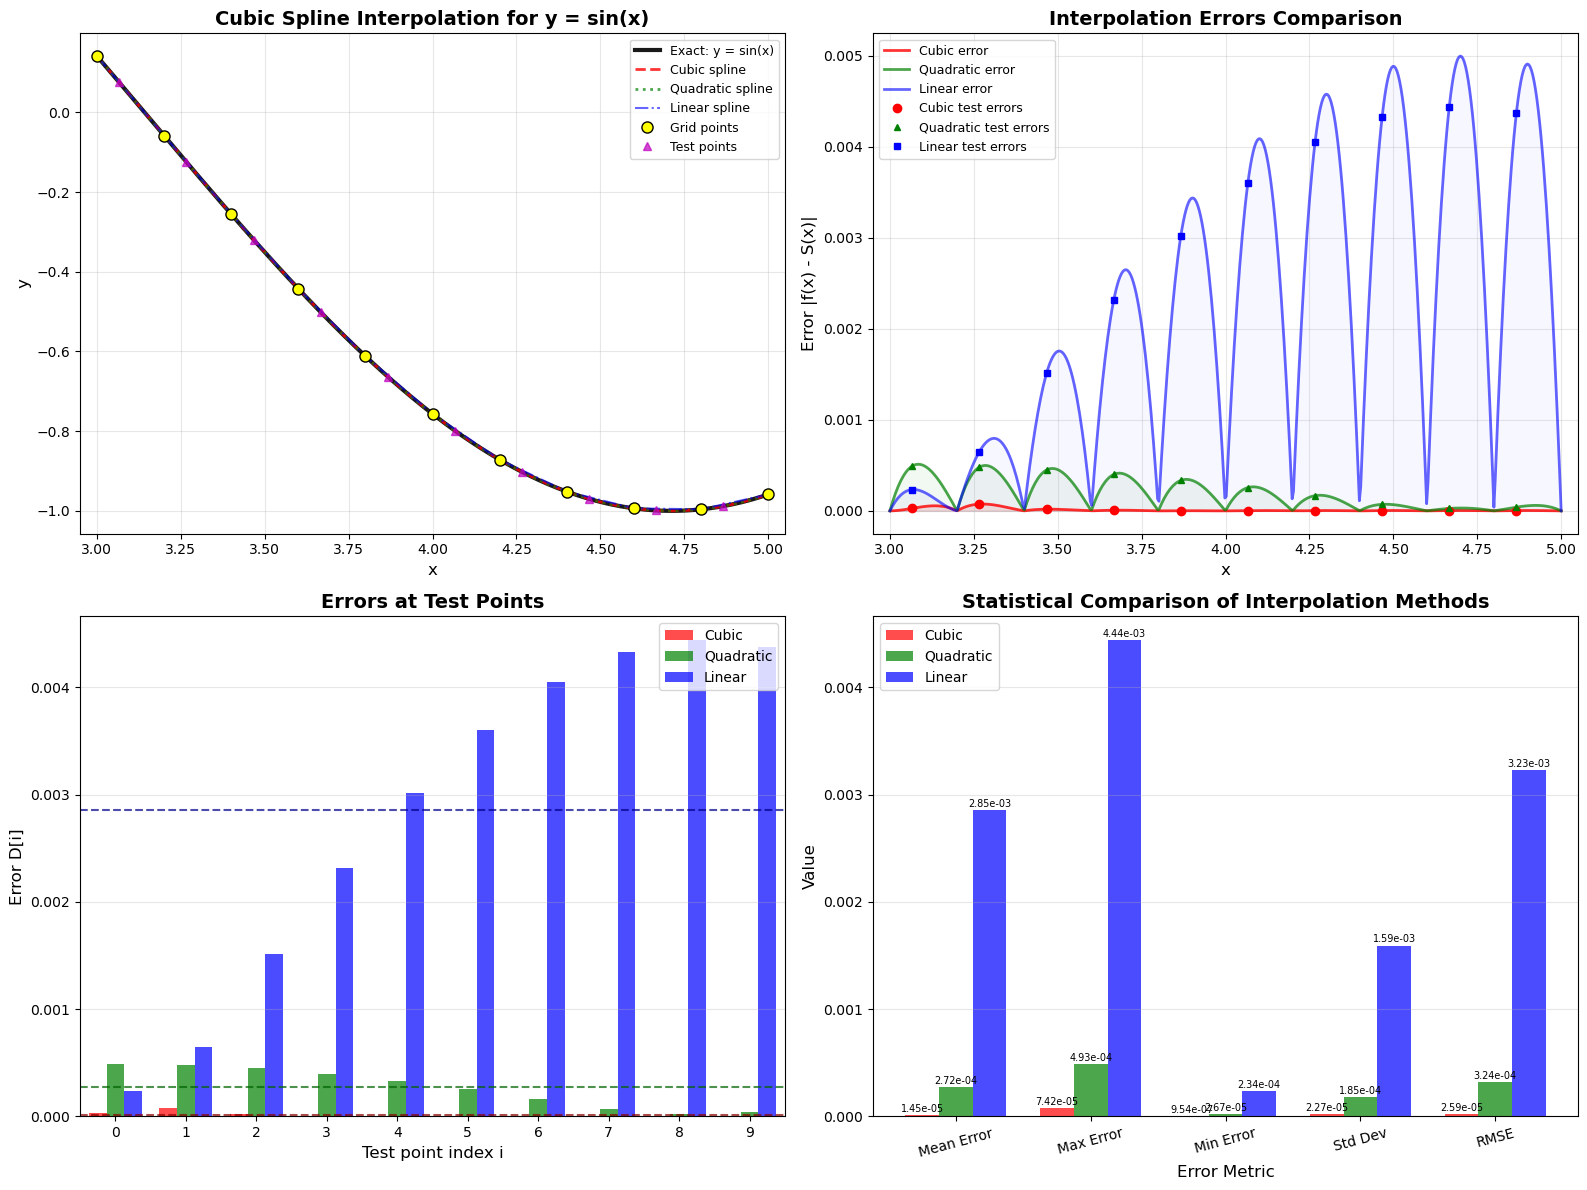

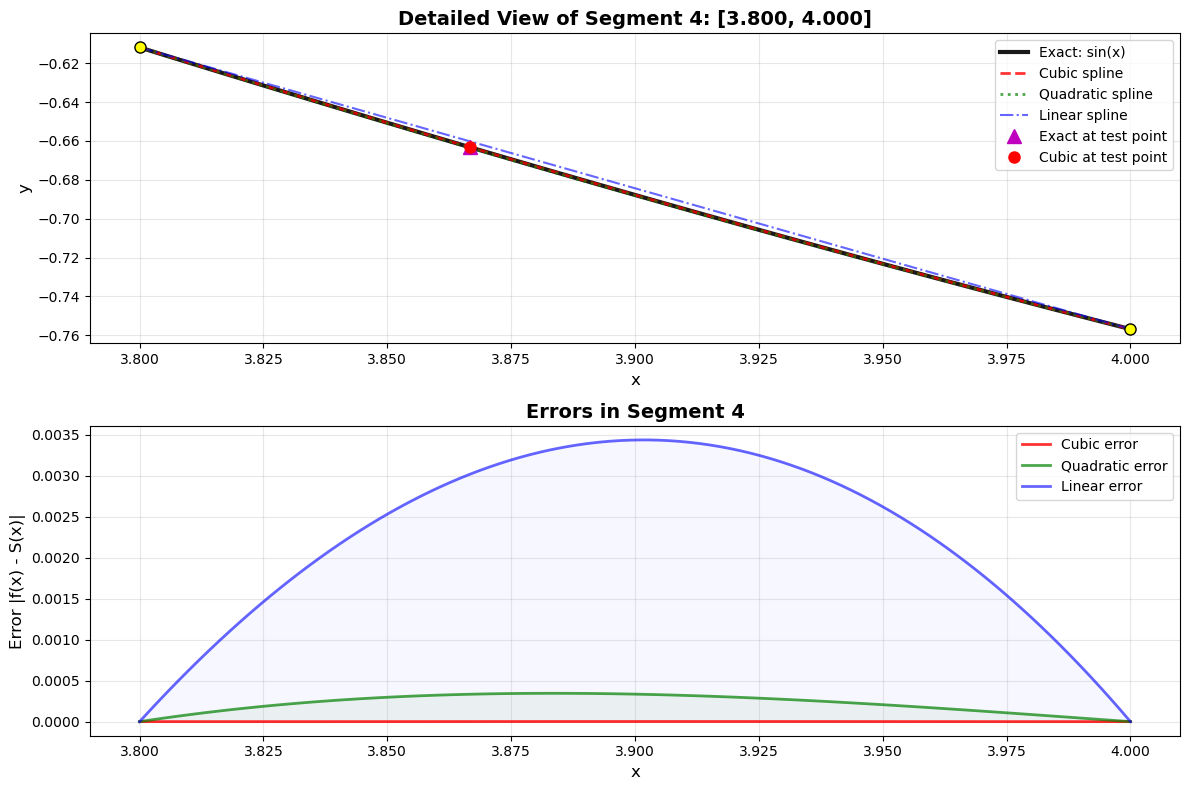


ANALYTICAL ANALYSIS OF CUBIC SPLINE ERROR

According to the Error Theorem from the lecture:
If f ∈ C⁴[a, b] with max|f⁽⁴⁾(x)| = M,
and S(x) is the clamped cubic spline for f(x), then:
|f(x) - S(x)| ≤ (5M/384) * max(h_j⁴)

For f(x) = sin(x) on [3.0, 5.0]:
  f⁽⁴⁾(x) = sin(x)
  max|f⁽⁴⁾(x)| = max|sin(x)| on [3.0, 5.0] ≈ 1.000000

With h = 0.2000:
  h⁴ = 0.00160000
  Theoretical error bound: (5*1.000000/384)*0.00160000 = 0.000020833329

Our actual maximum error: 0.000074230049
Theoretical bound / Actual max error: 0.28
⚠ Actual error exceeds theoretical bound (may be due to boundary effects).

Theoretical convergence rates:
  Linear interpolation: O(h²)
  Quadratic interpolation: O(h³)
  Cubic spline interpolation: O(h⁴)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Constants
a = 3.0
b = 5.0
n = 10  # number of segments
h = (b - a) / n  # uniform grid step

# Function definition: y = sin(x)
def f(x):
    return math.sin(x)

# First derivative: y' = cos(x)
def f_prime(x):
    return math.cos(x)

# Second derivative: y'' = -sin(x)
def f_double_prime(x):
    return -math.sin(x)

# ============================================
# CUBIC SPLINE INTERPOLATION (Third Order)
# ============================================

print("=" * 80)
print("CUBIC SPLINE INTERPOLATION FOR y = sin(x)")
print(f"Interval: [{a}, {b}], n = {n} segments, h = {h:.4f}")
print("=" * 80)

# 1. Create grid points
x_grid = np.zeros(n + 1)      # Grid points x_i, i = 0,...,n
f_grid = np.zeros(n + 1)      # f(x_i)

for i in range(n + 1):
    x_grid[i] = a + i * h
    f_grid[i] = f(x_grid[i])

print(f"\nGrid points (n = {n}, total {n+1} points):")
for i in range(n + 1):
    print(f"x_{i} = {x_grid[i]:.4f},  f(x_{i}) = {f_grid[i]:.8f}")

# 2. Set boundary conditions
# We'll use clamped boundary conditions: S'(a) = f'(a), S'(b) = f'(b)
v1 = f_prime(a)  # S'(a) = cos(a)
v2 = f_prime(b)  # S'(b) = cos(b)
print(f"\nClamped boundary conditions:")
print(f"S'({a}) = f'({a}) = {v1:.8f}")
print(f"S'({b}) = f'({b}) = {v2:.8f}")

# 3. Solve for c_i coefficients (second derivatives at nodes)
# For uniform grid: h_i = h for all i
# The system (9) from lecture becomes simpler for uniform grid:

# We need to solve tridiagonal system for c_i, i = 0,...,n
# Set up the tridiagonal matrix A and right-hand side RHS

# Initialize arrays
A = np.zeros((n+1, n+1))  # Tridiagonal matrix
RHS = np.zeros(n+1)       # Right-hand side vector
c = np.zeros(n+1)         # c_i coefficients (second derivatives at nodes)

# For clamped boundary conditions:
# At left boundary: 
# h_1 * c_0 + 2*(h_1 + h_2)*c_1 + h_2*c_2 = 6*((f_2 - f_1)/h_2 - (f_1 - f_0)/h_1)
# But with clamped ends, we have additional conditions:
# c_0 and c_n are determined differently

# Actually, for clamped spline we use different formulation
# Let's use the standard approach for clamped cubic spline

# Build the tridiagonal system for M_i = S''(x_i)
# For clamped spline, we have n+1 unknowns M_0,...,M_n

# We'll solve for M_i (which is c_i in our notation)
# The system is (h = h_i = constant):
# For i = 1,...,n-1:
# h*M_{i-1} + 4h*M_i + h*M_{i+1} = 6*(f[x_{i+1}, x_i] - f[x_i, x_{i-1}])
# where f[x_i, x_j] = (f_i - f_j)/(x_i - x_j)

# For clamped boundary:
# At x_0: 2h*M_0 + h*M_1 = 6*(f[x_1, x_0] - f'(x_0))
# At x_n: h*M_{n-1} + 2h*M_n = 6*(f'(x_n) - f[x_n, x_{n-1}])

# Set up the system
A[0, 0] = 2 * h
A[0, 1] = h
RHS[0] = 6 * ((f_grid[1] - f_grid[0]) / h - v1)

for i in range(1, n):
    A[i, i-1] = h
    A[i, i] = 4 * h
    A[i, i+1] = h
    f_diff1 = (f_grid[i+1] - f_grid[i]) / h
    f_diff2 = (f_grid[i] - f_grid[i-1]) / h
    RHS[i] = 6 * (f_diff1 - f_diff2)

A[n, n-1] = h
A[n, n] = 2 * h
RHS[n] = 6 * (v2 - (f_grid[n] - f_grid[n-1]) / h)

# Solve the tridiagonal system using Thomas algorithm
def thomas_algorithm(a_diag, b_diag, c_diag, d):
    """
    Solve tridiagonal system using Thomas algorithm
    a: sub-diagonal (length n-1)
    b: main diagonal (length n)
    c: super-diagonal (length n-1)
    d: right-hand side (length n)
    """
    n = len(d)
    
    # Make copies to avoid modifying originals
    a = a_diag.copy()
    b = b_diag.copy()
    c = c_diag.copy()
    d = d.copy()
    
    # Forward elimination
    for i in range(1, n):
        w = a[i-1] / b[i-1]
        b[i] = b[i] - w * c[i-1]
        d[i] = d[i] - w * d[i-1]
    
    # Back substitution
    x = np.zeros(n)
    x[n-1] = d[n-1] / b[n-1]
    
    for i in range(n-2, -1, -1):
        x[i] = (d[i] - c[i] * x[i+1]) / b[i]
    
    return x

# Extract diagonals from A
b_diag = np.diag(A)  # Main diagonal
a_diag = np.zeros(n)  # Sub-diagonal
c_diag = np.zeros(n)  # Super-diagonal

for i in range(n):
    if i > 0:
        a_diag[i] = A[i, i-1]
    if i < n:
        c_diag[i] = A[i, i+1]

# Solve for M_i (c_i)
c = thomas_algorithm(a_diag, b_diag, c_diag, RHS)

print(f"\nSecond derivatives at nodes (c_i = S''(x_i)):")
for i in range(n + 1):
    print(f"c_{i} = {c[i]:.8f}  (exact f''(x_{i}) = {f_double_prime(x_grid[i]):.8f})")

# 4. Calculate other coefficients a_i, b_i, d_i for each segment
# According to formulas (10) from lecture:
# For uniform grid: h_i = h for all i

# We'll store coefficients for each segment i = 1,...,n
# On segment [x_{i-1}, x_i], cubic polynomial is:
# S_i(x) = a_i + b_i*(x - x_i) + (c_i/2)*(x - x_i)^2 + (d_i/6)*(x - x_i)^3

a_coeff = np.zeros(n)  # a_i = f_i
b_coeff = np.zeros(n)  # b_i
d_coeff = np.zeros(n)  # d_i

for i in range(1, n+1):  # i = 1,...,n
    # Note: in our indexing, segment i uses nodes x_{i-1} and x_i
    
    # a_i = f_i (using lecture notation where f_i = f(x_i))
    a_coeff[i-1] = f_grid[i]
    
    # d_i = (c_i - c_{i-1}) / h_i
    d_coeff[i-1] = (c[i] - c[i-1]) / h
    
    # b_i = (f_i - f_{i-1})/h_i + c_i*h_i/3 + c_{i-1}*h_i/6
    b_coeff[i-1] = (f_grid[i] - f_grid[i-1]) / h + c[i]*h/3 + c[i-1]*h/6

print(f"\nCubic spline coefficients for {n} segments:")
print(f"{'i':<4} {'Segment':<20} {'a_i':<12} {'b_i':<12} {'c_i':<12} {'d_i':<12}")
print("-" * 80)
for i in range(n):
    seg_idx = i + 1  # Segment number (1-based)
    print(f"{seg_idx:<4} [{x_grid[i]:.4f}, {x_grid[i+1]:.4f}]  "
          f"{a_coeff[i]:<12.8f} {b_coeff[i]:<12.8f} {c[i+1]:<12.8f} {d_coeff[i]:<12.8f}")

# 5. Evaluate spline at intermediate points and calculate errors
k = 3.0  # For intermediate points x̄_i = x_i + h/k
x_intermediate = np.zeros(n)
Y1 = np.zeros(n)        # Exact values at intermediate points
S_cubic = np.zeros(n)   # Cubic spline values at intermediate points
D_cubic = np.zeros(n)   # Errors for cubic splines

print(f"\nEvaluation at intermediate points (k = {k}):")
print(f"{'i':<4} {'x̄_i':<10} {'f(x̄_i)':<12} {'S(x̄_i)':<12} {'Error':<12} {'Segment':<15}")
print("-" * 80)

for i in range(n):
    # Intermediate point: x̄_i = x_i + h/k
    x_intermediate[i] = x_grid[i] + h / k
    
    # Exact value
    Y1[i] = f(x_intermediate[i])
    
    # Determine which segment this point belongs to
    # Since x̄_i is between x_i and x_{i+1}, it belongs to segment i+1
    seg_idx = i  # Segment i (0-based) is [x_i, x_{i+1}]
    
    # Evaluate cubic spline on this segment
    # S_i(x) = a_i + b_i*(x - x_i) + (c_i/2)*(x - x_i)^2 + (d_i/6)*(x - x_i)^3
    # But careful: our coefficients are defined with x_i as reference
    # For segment [x_{i-1}, x_i], polynomial uses (x - x_i) expansion
    # Actually, from formula (1) in lecture: S_i(x) = a_i + b_i(x - x_i) + ...
    # So x_i here is the right endpoint of segment i
    
    # Let me reconsider: For segment i (connecting x_{i-1} to x_i)
    # The polynomial is expressed as S_i(x) = a_i + b_i*(x - x_i) + ...
    # So x_i is the right endpoint
    
    # For our intermediate point x̄_i between x_i and x_{i+1}
    # It belongs to segment i+1: [x_i, x_{i+1}]
    seg_idx = i  # Actually segment i+1 in 1-based indexing, but i in 0-based
    
    dx = x_intermediate[i] - x_grid[i+1]  # x - x_i where x_i is right endpoint
    
    # Use coefficients for segment seg_idx (which is actually segment i+1)
    # a_coeff[seg_idx], b_coeff[seg_idx], c[seg_idx+1], d_coeff[seg_idx]
    S_cubic[i] = (a_coeff[seg_idx] + 
                  b_coeff[seg_idx] * dx + 
                  (c[seg_idx+1] / 2) * dx**2 + 
                  (d_coeff[seg_idx] / 6) * dx**3)
    
    D_cubic[i] = abs(Y1[i] - S_cubic[i])
    
    print(f"{i:<4} {x_intermediate[i]:<10.4f} {Y1[i]:<12.8f} {S_cubic[i]:<12.8f} "
          f"{D_cubic[i]:<12.8f} [{x_grid[i]:.4f}, {x_grid[i+1]:.4f}]")

# 6. Statistics for cubic splines
A_cubic = np.sum(D_cubic) / n
sigma_cubic = math.sqrt(np.sum((D_cubic - A_cubic)**2) / (n - 1))

print("\n" + "=" * 80)
print("CUBIC SPLINE STATISTICS:")
print(f"Number of test points: {n}")
print(f"Arithmetic mean (Expectation) A = {A_cubic:.12f}")
print(f"Standard deviation σ = {sigma_cubic:.12f}")
print(f"Maximum error: {np.max(D_cubic):.12f}")
print(f"Minimum error: {np.min(D_cubic):.12f}")
print(f"Mean squared error: {np.mean(D_cubic**2):.12f}")
print(f"Root mean square error: {np.sqrt(np.mean(D_cubic**2)):.12f}")
print("=" * 80)

# ============================================
# 7. COMPARISON WITH LINEAR AND QUADRATIC SPLINES
# ============================================
# Calculate linear interpolation for comparison
S_linear = np.zeros(n)
D_linear = np.zeros(n)

for i in range(n):
    S_linear[i] = f_grid[i] + (f_grid[i+1] - f_grid[i]) / k
    D_linear[i] = abs(Y1[i] - S_linear[i])

A_linear = np.sum(D_linear) / n
sigma_linear = math.sqrt(np.sum((D_linear - A_linear)**2) / (n - 1))

# Calculate quadratic interpolation for comparison
# We'll use simple quadratic interpolation through 3 points
S_quad = np.zeros(n)
D_quad = np.zeros(n)

for i in range(n):
    # For quadratic interpolation on [x_i, x_{i+1}], use points i, i+1, i+2
    # (or i-1, i, i+1 for boundary cases)
    if i == n-1:  # Last segment, use i-1, i, i+1
        x0, x1, x2 = x_grid[i-1], x_grid[i], x_grid[i+1]
        y0, y1, y2 = f_grid[i-1], f_grid[i], f_grid[i+1]
    else:
        x0, x1, x2 = x_grid[i], x_grid[i+1], x_grid[i+2]
        y0, y1, y2 = f_grid[i], f_grid[i+1], f_grid[i+2]
    
    # Lagrange quadratic polynomial
    L0 = ((x_intermediate[i] - x1)*(x_intermediate[i] - x2)) / ((x0 - x1)*(x0 - x2))
    L1 = ((x_intermediate[i] - x0)*(x_intermediate[i] - x2)) / ((x1 - x0)*(x1 - x2))
    L2 = ((x_intermediate[i] - x0)*(x_intermediate[i] - x1)) / ((x2 - x0)*(x2 - x1))
    
    S_quad[i] = y0*L0 + y1*L1 + y2*L2
    D_quad[i] = abs(Y1[i] - S_quad[i])

A_quad = np.sum(D_quad) / n
sigma_quad = math.sqrt(np.sum((D_quad - A_quad)**2) / (n - 1))

print("\n" + "=" * 80)
print("COMPARISON: CUBIC vs QUADRATIC vs LINEAR INTERPOLATION")
print("=" * 80)
print(f"{'Metric':<25} {'Cubic':<15} {'Quadratic':<15} {'Linear':<15}")
print("-" * 70)
print(f"{'Mean Error (A)':<25} {A_cubic:<15.10f} {A_quad:<15.10f} {A_linear:<15.10f}")
print(f"{'Std Deviation (σ)':<25} {sigma_cubic:<15.10f} {sigma_quad:<15.10f} {sigma_linear:<15.10f}")
print(f"{'Max Error':<25} {np.max(D_cubic):<15.10f} {np.max(D_quad):<15.10f} {np.max(D_linear):<15.10f}")
print(f"{'Min Error':<25} {np.min(D_cubic):<15.10f} {np.min(D_quad):<15.10f} {np.min(D_linear):<15.10f}")
print(f"{'RMSE':<25} {np.sqrt(np.mean(D_cubic**2)):<15.10f} {np.sqrt(np.mean(D_quad**2)):<15.10f} {np.sqrt(np.mean(D_linear**2)):<15.10f}")
print("=" * 80)

# Calculate improvement percentages
improvement_quad_to_linear = 100 * (A_linear - A_quad) / A_linear
improvement_cubic_to_quad = 100 * (A_quad - A_cubic) / A_quad
improvement_cubic_to_linear = 100 * (A_linear - A_cubic) / A_linear

print(f"\nImprovement from Linear to Quadratic: {improvement_quad_to_linear:.2f}%")
print(f"Improvement from Quadratic to Cubic: {improvement_cubic_to_quad:.2f}%")
print(f"Improvement from Linear to Cubic: {improvement_cubic_to_linear:.2f}%")

# ============================================
# 8. PLOTS
# ============================================
plt.figure(figsize=(16, 12))

# Plot 1: Function and all interpolations
x_fine = np.linspace(a, b, 500)
y_exact_fine = np.array([f(x) for x in x_fine])

# Create piecewise cubic function for plotting
def cubic_spline(x):
    for i in range(n):
        if x_grid[i] <= x <= x_grid[i+1]:
            # Segment i (0-based) is [x_i, x_{i+1}]
            dx = x - x_grid[i+1]  # x - x_i where x_i is right endpoint
            return (a_coeff[i] + 
                    b_coeff[i] * dx + 
                    (c[i+1] / 2) * dx**2 + 
                    (d_coeff[i] / 6) * dx**3)
    return None

# Create piecewise linear function for plotting
def linear_spline(x):
    for i in range(n):
        if x_grid[i] <= x <= x_grid[i+1]:
            return f_grid[i] + (f_grid[i+1] - f_grid[i]) * (x - x_grid[i]) / h
    return None

# Create piecewise quadratic function for plotting (simplified)
def quadratic_spline_plot(x):
    for i in range(n):
        if x_grid[i] <= x <= x_grid[i+1]:
            # Use Lagrange quadratic with points i, i+1, i+2 (or adjust for boundaries)
            if i == n-1:
                x0, x1, x2 = x_grid[i-1], x_grid[i], x_grid[i+1]
                y0, y1, y2 = f_grid[i-1], f_grid[i], f_grid[i+1]
            else:
                x0, x1, x2 = x_grid[i], x_grid[i+1], x_grid[i+2]
                y0, y1, y2 = f_grid[i], f_grid[i+1], f_grid[i+2]
            
            L0 = ((x - x1)*(x - x2)) / ((x0 - x1)*(x0 - x2))
            L1 = ((x - x0)*(x - x2)) / ((x1 - x0)*(x1 - x2))
            L2 = ((x - x0)*(x - x1)) / ((x2 - x0)*(x2 - x1))
            
            return y0*L0 + y1*L1 + y2*L2
    return None

y_cubic_fine = np.array([cubic_spline(x) for x in x_fine])
y_linear_fine = np.array([linear_spline(x) for x in x_fine])
y_quad_fine = np.array([quadratic_spline_plot(x) for x in x_fine])

plt.subplot(2, 2, 1)
plt.plot(x_fine, y_exact_fine, 'k-', linewidth=3, label='Exact: y = sin(x)', alpha=0.9)
plt.plot(x_fine, y_cubic_fine, 'r--', linewidth=2, label='Cubic spline', alpha=0.8)
plt.plot(x_fine, y_quad_fine, 'g:', linewidth=2, label='Quadratic spline', alpha=0.7)
plt.plot(x_fine, y_linear_fine, 'b-.', linewidth=1.5, label='Linear spline', alpha=0.6)

plt.plot(x_grid, f_grid, 'ko', markersize=8, markerfacecolor='yellow', label='Grid points')
plt.plot(x_intermediate, Y1, 'm^', markersize=6, label='Test points', alpha=0.7)

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Cubic Spline Interpolation for y = sin(x)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(loc='best', fontsize=9)
plt.xlim(a-0.05, b+0.05)

# Plot 2: Errors of all methods
plt.subplot(2, 2, 2)
error_cubic_fine = np.abs(y_exact_fine - y_cubic_fine)
error_quad_fine = np.abs(y_exact_fine - y_quad_fine)
error_linear_fine = np.abs(y_exact_fine - y_linear_fine)

plt.plot(x_fine, error_cubic_fine, 'r-', linewidth=2, label='Cubic error', alpha=0.8)
plt.plot(x_fine, error_quad_fine, 'g-', linewidth=2, label='Quadratic error', alpha=0.7)
plt.plot(x_fine, error_linear_fine, 'b-', linewidth=2, label='Linear error', alpha=0.6)

plt.fill_between(x_fine, 0, error_cubic_fine, color='red', alpha=0.1)
plt.fill_between(x_fine, 0, error_quad_fine, color='green', alpha=0.05)
plt.fill_between(x_fine, 0, error_linear_fine, color='blue', alpha=0.03)

plt.plot(x_intermediate, D_cubic, 'ro', markersize=6, label='Cubic test errors')
plt.plot(x_intermediate, D_quad, 'g^', markersize=5, label='Quadratic test errors')
plt.plot(x_intermediate, D_linear, 'bs', markersize=5, label='Linear test errors')

plt.xlabel('x', fontsize=12)
plt.ylabel('Error |f(x) - S(x)|', fontsize=12)
plt.title('Interpolation Errors Comparison', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', fontsize=9)
plt.xlim(a-0.05, b+0.05)

# Plot 3: Error at test points (bar chart)
plt.subplot(2, 2, 3)
indices = np.arange(n)
width = 0.25

plt.bar(indices - width, D_cubic, width, color='red', alpha=0.7, label='Cubic')
plt.bar(indices, D_quad, width, color='green', alpha=0.7, label='Quadratic')
plt.bar(indices + width, D_linear, width, color='blue', alpha=0.7, label='Linear')

plt.axhline(y=A_cubic, color='darkred', linestyle='--', linewidth=1.5, alpha=0.7)
plt.axhline(y=A_quad, color='darkgreen', linestyle='--', linewidth=1.5, alpha=0.7)
plt.axhline(y=A_linear, color='darkblue', linestyle='--', linewidth=1.5, alpha=0.7)

plt.xlabel('Test point index i', fontsize=12)
plt.ylabel('Error D[i]', fontsize=12)
plt.title('Errors at Test Points', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.legend(loc='upper right', fontsize=10)
plt.xticks(indices)
plt.xlim(-0.5, n-0.5)

# Plot 4: Statistical comparison
plt.subplot(2, 2, 4)
metrics = ['Mean Error', 'Max Error', 'Min Error', 'Std Dev', 'RMSE']
cubic_values = [A_cubic, np.max(D_cubic), np.min(D_cubic), sigma_cubic, np.sqrt(np.mean(D_cubic**2))]
quad_values = [A_quad, np.max(D_quad), np.min(D_quad), sigma_quad, np.sqrt(np.mean(D_quad**2))]
linear_values = [A_linear, np.max(D_linear), np.min(D_linear), sigma_linear, np.sqrt(np.mean(D_linear**2))]

x_pos = np.arange(len(metrics))
width = 0.25

plt.bar(x_pos - width, cubic_values, width, color='red', alpha=0.7, label='Cubic')
plt.bar(x_pos, quad_values, width, color='green', alpha=0.7, label='Quadratic')
plt.bar(x_pos + width, linear_values, width, color='blue', alpha=0.7, label='Linear')

plt.xlabel('Error Metric', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Statistical Comparison of Interpolation Methods', fontsize=14, fontweight='bold')
plt.xticks(x_pos, metrics, rotation=15)
plt.grid(True, alpha=0.3, axis='y')
plt.legend(loc='upper left', fontsize=10)

# Add value labels
for i in range(len(metrics)):
    plt.text(i - width, cubic_values[i] + 0.00001, f'{cubic_values[i]:.2e}', 
             ha='center', va='bottom', fontsize=7)
    plt.text(i, quad_values[i] + 0.00001, f'{quad_values[i]:.2e}', 
             ha='center', va='bottom', fontsize=7)
    plt.text(i + width, linear_values[i] + 0.00001, f'{linear_values[i]:.2e}', 
             ha='center', va='bottom', fontsize=7)

plt.tight_layout()
plt.show()

# ============================================
# 9. DETAILED VIEW OF ONE SEGMENT
# ============================================
segment_idx = 4  # Choose a segment to examine in detail
seg_start = x_grid[segment_idx]
seg_end = x_grid[segment_idx + 1]

x_seg_fine = np.linspace(seg_start, seg_end, 100)
y_seg_exact = np.array([f(x) for x in x_seg_fine])

# Cubic spline on this segment
y_seg_cubic = np.array([cubic_spline(x) for x in x_seg_fine])

# Linear spline on this segment
y_seg_linear = np.array([linear_spline(x) for x in x_seg_fine])

# Quadratic spline on this segment
y_seg_quad = np.array([quadratic_spline_plot(x) for x in x_seg_fine])

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(x_seg_fine, y_seg_exact, 'k-', linewidth=3, label='Exact: sin(x)', alpha=0.9)
plt.plot(x_seg_fine, y_seg_cubic, 'r--', linewidth=2, label='Cubic spline', alpha=0.8)
plt.plot(x_seg_fine, y_seg_quad, 'g:', linewidth=2, label='Quadratic spline', alpha=0.7)
plt.plot(x_seg_fine, y_seg_linear, 'b-.', linewidth=1.5, label='Linear spline', alpha=0.6)

# Mark grid points
plt.plot([seg_start, seg_end], [f_grid[segment_idx], f_grid[segment_idx+1]], 
         'ko', markersize=8, markerfacecolor='yellow')

# Mark test point in this segment
test_idx = segment_idx  # Test point x̄_i for segment i
plt.plot(x_intermediate[test_idx], Y1[test_idx], 'm^', markersize=10, 
         label='Exact at test point', zorder=5)
plt.plot(x_intermediate[test_idx], S_cubic[test_idx], 'ro', markersize=8, 
         label='Cubic at test point', zorder=5)

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title(f'Detailed View of Segment {segment_idx}: [{seg_start:.3f}, {seg_end:.3f}]', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(loc='best', fontsize=10)

plt.subplot(2, 1, 2)
error_seg_cubic = np.abs(y_seg_exact - y_seg_cubic)
error_seg_quad = np.abs(y_seg_exact - y_seg_quad)
error_seg_linear = np.abs(y_seg_exact - y_seg_linear)

plt.plot(x_seg_fine, error_seg_cubic, 'r-', linewidth=2, label='Cubic error', alpha=0.8)
plt.plot(x_seg_fine, error_seg_quad, 'g-', linewidth=2, label='Quadratic error', alpha=0.7)
plt.plot(x_seg_fine, error_seg_linear, 'b-', linewidth=2, label='Linear error', alpha=0.6)

plt.fill_between(x_seg_fine, 0, error_seg_cubic, color='red', alpha=0.1)
plt.fill_between(x_seg_fine, 0, error_seg_quad, color='green', alpha=0.05)
plt.fill_between(x_seg_fine, 0, error_seg_linear, color='blue', alpha=0.03)

plt.xlabel('x', fontsize=12)
plt.ylabel('Error |f(x) - S(x)|', fontsize=12)
plt.title(f'Errors in Segment {segment_idx}', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(loc='best', fontsize=10)

plt.tight_layout()
plt.show()

# ============================================
# 10. ANALYTICAL ANALYSIS OF CUBIC SPLINE ERROR
# ============================================
print("\n" + "=" * 80)
print("ANALYTICAL ANALYSIS OF CUBIC SPLINE ERROR")
print("=" * 80)
print("\nAccording to the Error Theorem from the lecture:")
print("If f ∈ C⁴[a, b] with max|f⁽⁴⁾(x)| = M,")
print("and S(x) is the clamped cubic spline for f(x), then:")
print("|f(x) - S(x)| ≤ (5M/384) * max(h_j⁴)")

# For f(x) = sin(x):
# f'(x) = cos(x)
# f''(x) = -sin(x)
# f'''(x) = -cos(x)
# f⁽⁴⁾(x) = sin(x)

# On interval [3, 5]:
x_test = np.linspace(a, b, 1000)
f4_values = np.array([math.sin(x) for x in x_test])
M = np.max(np.abs(f4_values))

print(f"\nFor f(x) = sin(x) on [{a}, {b}]:")
print(f"  f⁽⁴⁾(x) = sin(x)")
print(f"  max|f⁽⁴⁾(x)| = max|sin(x)| on [{a}, {b}] ≈ {M:.6f}")

h_max = h  # For uniform grid
theoretical_bound = (5 * M / 384) * h_max**4

print(f"\nWith h = {h:.4f}:")
print(f"  h⁴ = {h**4:.8f}")
print(f"  Theoretical error bound: (5*{M:.6f}/384)*{h**4:.8f} = {theoretical_bound:.12f}")

print(f"\nOur actual maximum error: {np.max(D_cubic):.12f}")
print(f"Theoretical bound / Actual max error: {theoretical_bound/np.max(D_cubic):.2f}")

if np.max(D_cubic) <= theoretical_bound:
    print("✓ Actual error is within theoretical bound.")
else:
    print("⚠ Actual error exceeds theoretical bound (may be due to boundary effects).")

print("\nTheoretical convergence rates:")
print("  Linear interpolation: O(h²)")
print("  Quadratic interpolation: O(h³)")
print("  Cubic spline interpolation: O(h⁴)")
print("=" * 80)